In [1]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Linear regression with classical least squares
One of the simplest aprroaches to curve fitting is linear least-squares regression. In this method, it is assumed that your data $\mathbf{d}$ can be modeled by a linear combination of some unknown model parameters $\mathbf{m}$. The most straightforward example of this is fitting a straight line to scattered data points. Mathematicaly, this can be written

$d_{i} = m_{1} + m_{2}x_{i}$

where $d_{i}$ is the value of the $i^{th}$ data point, $x_{i}$ is the value of the independent variable $x$ at index $i$, and $m_{1}$ and $m_{2}$ are your unknown "model parameters", which in this case represent the y-intercept and the slope of you best fitting line, respectively. This equation represents a matrix-vector system, which can be solved for the unknown model parameters. The individual elements of the matrix-vector system are shown below

$\begin{bmatrix} d_1 \\ d_2 \\ d_3 \\ \vdots \\ d_N \end{bmatrix} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \\ \vdots & \vdots \\ 1 & x_N \end{bmatrix} \begin{bmatrix} m_1 \\ m_2 \end{bmatrix} $

or, rewriting the data vector as $\mathbf{d}$, the data 'kernel' (also referred to as the sensitivity matrix) as $\mathbf{G}$, and the model vector as $\mathbf{m}$:

$\mathbf{d} = \mathbf{G} \mathbf{m} $

In this notebook we will first solve this problem using the classical 'least squares' solution, which has a closed form solution, and then solve it using a neural network. The least-squares solution is the solution that minimizes the sum of the squared residuals (i.e., the misfit between your model prediction and your data). Mathematically, the least squares solution to the matrix vector system above is given as

$\mathbf{m}^{lsq} = \left[ \mathbf{G}^T \mathbf{G} \right] ^{-1} \mathbf{G}^{T}\mathbf{d}$

where $\mathbf{m}^{lsq}$ is the solution vector, and the superscripts $^{T}$ and $^{-1}$ indicate the matrix transpose and inverse, respectively. In this exercise, we will perform these matrix operations using the python library numpy. 

In [2]:
#true model parameters
m1_true = 2.0 #slope
m2_true = 0.6 #intercept

#generate synthetic data
npts = 200
x = np.random.normal(loc=0.0,scale=2.0,size=npts)
x.sort() #not necessary, aranges the x values from low to high
noise = np.random.normal(loc=0.0,scale=1.0,size=npts)
d = m1_true*x + m2_true + noise

#build the G matrix
N = npts #number of scatter points
M = 2    #number of model parameters
G = np.zeros((N,M))
G[:,0] = 1
G[:,1] = x

sol = np.linalg.lstsq(G,d,rcond=None) #solve the least squares problem
m_est = sol[0]
m_1 = m_est[1] #slope
m_2 = m_est[0] #intercept
print('m1_true {}, m2 {}'.format(m1_true,m_1))
print("m2_true {}, m2 {}".format(m2_true,m_2))

m1_true 2.0, m2 2.039210935309885
m2_true 0.6, m2 0.6249978991545961


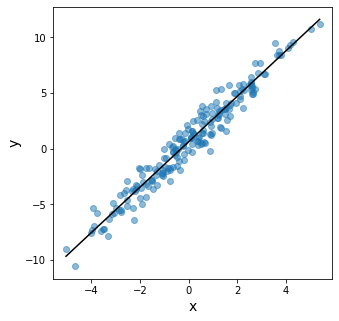

In [3]:
d_pred = np.dot(G,m_est)
fig,ax = plt.subplots(1,figsize=[5,5])
ax.scatter(x,d,alpha=0.5)
ax.plot(x,d_pred,c='k')
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
plt.savefig('linear_fit.png')

## Linear Regression with machine learning

Next, we will look at the same problem using a neural network. To keep with the parlance of machine learning, we will change the variable names a bit. Specifically, we will refer to the coefficient of the independent variable as the 'weight' (in this example it is the slope of our line), and the constant term as the 'bias' (in this case the y-intercept of our line)

$y = wx + b$

The general algorithm is:
1. initialize the weights and biases with a random guess
2. define a 'cost' function based on the misfit between the observed and predicted data
3. loop over your 'training data' and calculate the cost function
4. update the weights and biases based on the gradient of the cost function


In this case, the 'training data' is simply the set of scatter points that you want to fit. We will loop over the training data multiple times. Each loop over the training set is called a training 'epoch'. During each training epoch, we calculate the gradient of the cost function with respect to the weight(s) and bias(es), and use it to update the model parameters. The gradient first multiplied by a scalar value called the 'learning rate', which controls how large of a step you take in the 'downhill' direction. Where $\eta$ is the learning rate, these model updates can be written as

$b' = b - \eta \frac{\partial C}{\partial b}$

$w' = w - \eta \frac{\partial C}{\partial w}$

Defining the cost function $C = \frac{1}{2}(\hat{y} - y)^2$, where $\hat{y}$ is the model prediction for a given $w$ and $b$, the gradients of the cost function are

$\frac{\partial C}{\partial b} = (\hat{y} - y)$

$\frac{\partial C}{\partial w} = x(\hat{y} - y)$

## Numpy only neural network implemenation

In [4]:
#true model parameters
w_true = 2.0
b_true = 0.6

#generate synthetic data
npts = 200
x = np.random.normal(loc=0.0,scale=2.0,size=npts)
x.sort() #not necessary, aranges the x values from low to high
noise = np.random.normal(loc=0.0,scale=1.0,size=npts)
y = w_true*x + b_true + noise

#initialize weight(s) and bias(es) as random number
w = np.random.random()
b = np.random.random()

#hyper parameters
learning_rate = 1e-5 #learning rate
nepochs = 500

#main training loop
all_loss = []
for i in range(0,nepochs):

    y_pred = w*x + b
    loss = 0.5*np.square(y_pred - y).sum()
    grad_y_pred = (y_pred - y)
    grad_b = grad_y_pred.sum()
    grad_w = (grad_y_pred*x).sum()
    all_loss.append(loss)

    b -= learning_rate * grad_b
    w -= learning_rate * grad_w

    if i % 100 == 0:
        print('epoch: {}, loss: {}'.format(i,loss))
        
print('\n')
print('w = {}, w_true = {}'.format(w,w_true))
print('b = {}, b_true = {}'.format(b,b_true))


epoch: 0, loss: 1069.2507691369683
epoch: 100, loss: 267.341569665124
epoch: 200, loss: 131.25121295927238
epoch: 300, loss: 106.83813452524834
epoch: 400, loss: 101.5929982485639


w = 1.976848206577202, w_true = 2.0
b = 0.502312448006283, b_true = 0.6


Text(0, 0.5, 'y')

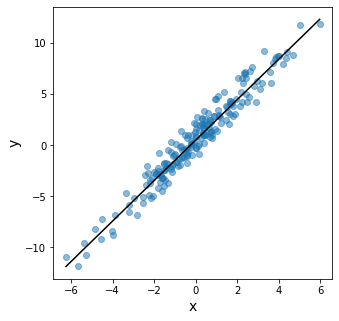

In [5]:
fig,ax = plt.subplots(1,figsize=[5,5])
ax.scatter(x,y,alpha=0.5)
ax.plot(x,y_pred,c='k')
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)

## Pytorch implementation

This follows mostly from Ch. 3.2 from "Dive into Deep Learning" (https://d2l.ai/), except that I modified example so that it only has one x variable. In Ch. 3.2, they refer to this example as "Linear Regression From Scratch" because they don't use some of the Pytorch API's which make the coding much more concise, but harder to follow what's going on underneath.

In [6]:
#create dataset
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X_mean = 0.0
    X_std = 2.0
    X = torch.normal(X_mean, X_std, (num_examples, len(w))) #X variable is drawn from normal distribution
    y = torch.matmul(X, w) + b #generate data
    y += torch.normal(0, 1.0, y.shape) #add noise
    #return X, y.reshape((-1, 1))
    return X, y

#iterate through data in mini-batches
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

#the forward model
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

#the cost function
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#stochastic gradient descent
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [7]:
#put it all together

true_w = torch.tensor([2.0]) #true slope
true_b = 0.6                 #true intercept
features, labels = synthetic_data(true_w, true_b, 200)
w = torch.normal(0, 0.01, size=(1,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss
batch_size = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        
print('\n')

print('w = {}, w_true = {}'.format(w.detach().numpy()[0][0],w_true))
print('b = {}, b_true = {}'.format(b.detach().numpy()[0],true_b))

epoch 1, loss 0.688030
epoch 2, loss 0.579709
epoch 3, loss 0.566114
epoch 4, loss 0.557598
epoch 5, loss 0.555458
epoch 6, loss 0.554205
epoch 7, loss 0.554102
epoch 8, loss 0.554639
epoch 9, loss 0.555350
epoch 10, loss 0.554131


w = 1.9640532732009888, w_true = 2.0
b = 0.5981202721595764, b_true = 0.6


Text(0, 0.5, 'y')

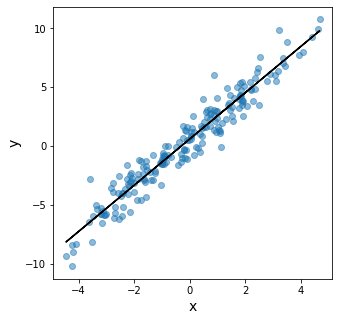

In [8]:
y_pred = torch.matmul(features, w) + b #model predictions at each x value
fig,ax = plt.subplots(1,figsize=[5,5])
ax.scatter(features,labels,alpha=0.5)
ax.plot(features,y_pred.detach().numpy(),c='k')
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)